In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [29]:
Matches=pd.read_csv("matches.csv")

In [30]:
Matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


#  How many rows and columns are there? 

In [31]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Match details

In [32]:
Matches.describe

<bound method NDFrame.describe of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           te

In [33]:
Matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [34]:
print("No of Rows are:",len(Matches))
print("No of columns are:",len(Matches.columns))

No of Rows are: 756
No of columns are: 18


#  756 rows are there that means we have details 756 matches that takes place between 2008-2019 


In [35]:
print("No of matches that takes place between 2008-2019 were:",len(Matches))


No of matches that takes place between 2008-2019 were: 756


# It looks like between 2011-2013.Total no matches exceeds 70.That because in these periods(2011-2013)there were 10 teams(kochi tuskers kerala and pune warriors india were the new additions

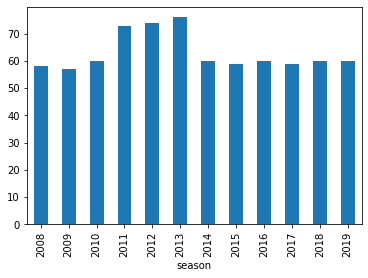

In [36]:
year_wise_analysing=Matches.groupby('season')
year_wise_analysing.count()
year_wise_analysing['id'].count().plot(kind='bar')

In [37]:
year_wise_analysing['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

In [38]:
Matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# from the below plot we can find huge missing values are there in umpire 3 columns .we can remove the column it will not create a impact on predicting the matches.

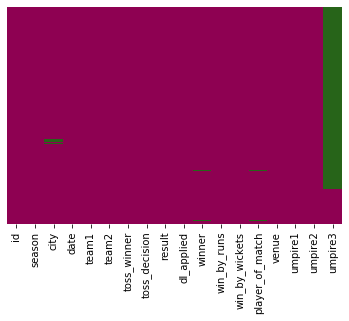

In [39]:
sns.heatmap(Matches.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

# Removed the columns containing more missing values and have less impact on the predicting matches

In [40]:
Matchess=Matches.drop(['umpire3','city'],axis=1,inplace=True)

In [41]:
Matchess.head(2)

AttributeError: 'NoneType' object has no attribute 'head'

#  No missing values are there(well some small amount are still there but will not have impact on Today's match)

In [42]:
sns.heatmap(Matchess.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

AttributeError: 'NoneType' object has no attribute 'isnull'

#  Today's match is between Royal Challengers Bangalore (RCB) and punjab(kXIP).so we only want information between the matches that had take place between them.

In [43]:
RCB_KXIP1=Matches.loc[(Matches['team1']=='Kings XI Punjab')&(Matches['team2'] =='Royal Challengers Bangalore')]
RCB_KXIP1

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
41,42,2017,2017-05-05,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,19,0,Sandeep Sharma,M Chinnaswamy Stadium,CB Gaffaney,C Shamshuddin
180,181,2010,2010-03-16,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Royal Challengers Bangalore,0,8,JH Kallis,M Chinnaswamy Stadium,S Das,DJ Harper
204,205,2010,2010-04-02,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Royal Challengers Bangalore,0,6,KP Pietersen,"Punjab Cricket Association Stadium, Mohali",BF Bowden,M Erasmus
295,296,2011,2011-05-17,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Kings XI Punjab,111,0,AC Gilchrist,Himachal Pradesh Cricket Association Stadium,Asad Rauf,AM Saheba
332,333,2012,2012-04-20,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,5,CH Gayle,"Punjab Cricket Association Stadium, Mohali",S Ravi,RJ Tucker
487,488,2014,2014-05-09,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,32,0,Sandeep Sharma,M Chinnaswamy Stadium,S Ravi,K Srinath
565,566,2015,2015-05-13,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,22,0,AR Patel,"Punjab Cricket Association Stadium, Mohali",JD Cloete,C Shamshuddin
643,7901,2018,13/04/18,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,UT Yadav,M Chinnaswamy Stadium,S Ravi,A.D Deshmukh
683,7941,2018,14/05/18,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,UT Yadav,Holkar Cricket Stadium,Bruce Oxenford,Virender Kumar Sharma
723,11319,2019,13/04/19,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,AB de Villiers,IS Bindra Stadium,S Ravi,Ulhas Gandhe


In [44]:
RCB_KXIP2=Matches.loc[(Matches['team2']=='Kings XI Punjab')&(Matches['team1'] =='Royal Challengers Bangalore')]
RCB_KXIP2

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
7,8,2017,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
83,84,2008,2008-05-05,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,S Sreesanth,M Chinnaswamy Stadium,SJ Davis,BR Doctrove
93,94,2008,2008-05-12,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,9,SE Marsh,"Punjab Cricket Association Stadium, Mohali",BR Doctrove,I Shivram
126,127,2009,2009-04-24,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,7,RS Bopara,Kingsmead,BR Doctrove,TH Wijewardene
138,139,2009,2009-05-01,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,8,0,Yuvraj Singh,Kingsmead,HDPK Dharmasena,S Ravi
279,280,2011,2011-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,85,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,RB Tiffin
349,350,2012,2012-05-02,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,4,Azhar Mahmood,M Chinnaswamy Stadium,BF Bowden,C Shamshuddin
428,429,2013,2013-05-14,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,AC Gilchrist,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi
447,448,2013,2013-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,DA Miller,"Punjab Cricket Association Stadium, Mohali",VA Kulkarni,NJ Llong
474,475,2014,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi


In [45]:
RCB_KXIP=RCB_KXIP1.append(RCB_KXIP2)

In [46]:
RCB_KXIP

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
41,42,2017,2017-05-05,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,19,0,Sandeep Sharma,M Chinnaswamy Stadium,CB Gaffaney,C Shamshuddin
180,181,2010,2010-03-16,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Royal Challengers Bangalore,0,8,JH Kallis,M Chinnaswamy Stadium,S Das,DJ Harper
204,205,2010,2010-04-02,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Royal Challengers Bangalore,0,6,KP Pietersen,"Punjab Cricket Association Stadium, Mohali",BF Bowden,M Erasmus
295,296,2011,2011-05-17,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Kings XI Punjab,111,0,AC Gilchrist,Himachal Pradesh Cricket Association Stadium,Asad Rauf,AM Saheba
332,333,2012,2012-04-20,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,5,CH Gayle,"Punjab Cricket Association Stadium, Mohali",S Ravi,RJ Tucker
487,488,2014,2014-05-09,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,32,0,Sandeep Sharma,M Chinnaswamy Stadium,S Ravi,K Srinath
565,566,2015,2015-05-13,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,22,0,AR Patel,"Punjab Cricket Association Stadium, Mohali",JD Cloete,C Shamshuddin
643,7901,2018,13/04/18,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,UT Yadav,M Chinnaswamy Stadium,S Ravi,A.D Deshmukh
683,7941,2018,14/05/18,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,UT Yadav,Holkar Cricket Stadium,Bruce Oxenford,Virender Kumar Sharma
723,11319,2019,13/04/19,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,AB de Villiers,IS Bindra Stadium,S Ravi,Ulhas Gandhe


# Complete details of matches that takes placed between RCB and KXIP

In [47]:
RCB_KXIP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 41 to 737
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               24 non-null     int64 
 1   season           24 non-null     int64 
 2   date             24 non-null     object
 3   team1            24 non-null     object
 4   team2            24 non-null     object
 5   toss_winner      24 non-null     object
 6   toss_decision    24 non-null     object
 7   result           24 non-null     object
 8   dl_applied       24 non-null     int64 
 9   winner           24 non-null     object
 10  win_by_runs      24 non-null     int64 
 11  win_by_wickets   24 non-null     int64 
 12  player_of_match  24 non-null     object
 13  venue            24 non-null     object
 14  umpire1          24 non-null     object
 15  umpire2          24 non-null     object
dtypes: int64(5), object(11)
memory usage: 3.2+ KB


In [48]:
RCB_KXIP.columns

Index(['id', 'season', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [49]:
RCB_KXIP.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,1868.208333,2013.500000,0.041667,21.458333,3.875000
std,3617.912297,3.526299,0.204124,39.828959,3.615336
min,8.000000,2008.000000,0.000000,0.000000,0.000000
25%,170.500000,2010.750000,0.000000,0.000000,0.000000
50%,389.500000,2013.500000,0.000000,0.000000,4.500000
75%,578.250000,2016.250000,0.000000,19.750000,7.000000
max,11333.000000,2019.000000,1.000000,138.000000,10.000000


In [50]:
RCB_KXIP.describe

<bound method NDFrame.describe of         id  season        date                        team1  \
41      42    2017  2017-05-05              Kings XI Punjab   
180    181    2010  2010-03-16              Kings XI Punjab   
204    205    2010  2010-04-02              Kings XI Punjab   
295    296    2011  2011-05-17              Kings XI Punjab   
332    333    2012  2012-04-20              Kings XI Punjab   
487    488    2014  2014-05-09              Kings XI Punjab   
565    566    2015  2015-05-13              Kings XI Punjab   
643   7901    2018    13/04/18              Kings XI Punjab   
683   7941    2018    14/05/18              Kings XI Punjab   
723  11319    2019    13/04/19              Kings XI Punjab   
7        8    2017  2017-04-10  Royal Challengers Bangalore   
83      84    2008  2008-05-05  Royal Challengers Bangalore   
93      94    2008  2008-05-12  Royal Challengers Bangalore   
126    127    2009  2009-04-24  Royal Challengers Bangalore   
138    139    2009  2

# 24 Matches played between RCB and KXIP

In [51]:
print("No of matches that takes place between RCB and KXIP:",len(RCB_KXIP))

No of matches that takes place between RCB and KXIP: 24


#  Below plot gives the details of the match that takes place between RCB and KXIP

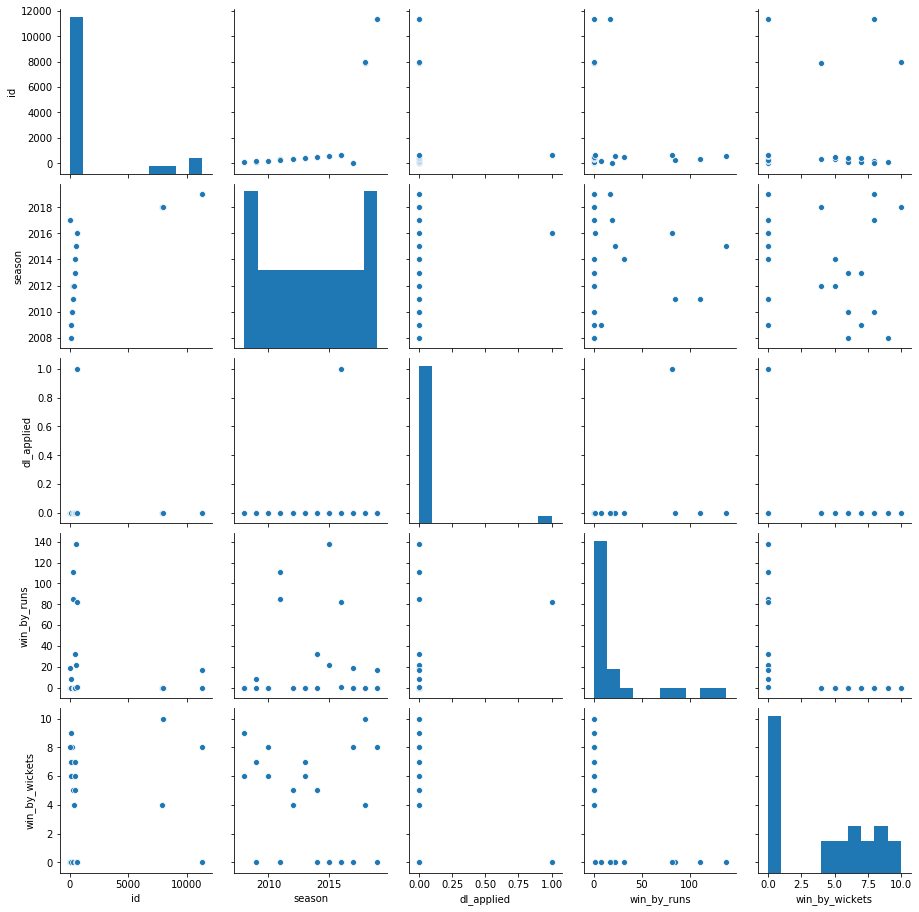

In [52]:
sns.pairplot(RCB_KXIP)

# It looks like  RCB won the Toss 11 Times and 13 Times KXIP won the Toss

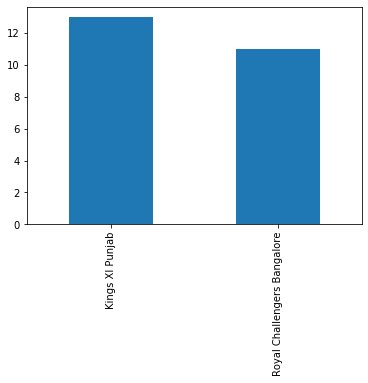

In [53]:
RCB_KXIP['toss_winner'].value_counts().plot(kind='bar')

# RCB went on to win the match 9 times when they decided to  field first and 3 times on batting first against KXIP .so total it is (RCB=won-12,loss-12)whereas for KXIP they won the match 8 times by fielding first and won 4 times by batting first against DC.so it is (KXIP=won-12,loss=12)

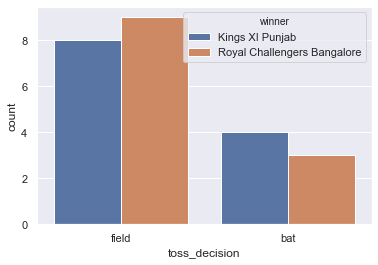

In [54]:
import sys
sys.setrecursionlimit(2000)
sns.set()
sns.countplot(x='toss_decision',hue="winner",data=RCB_KXIP)

# RCB win 11 times when they won the Toss and KXIP win 

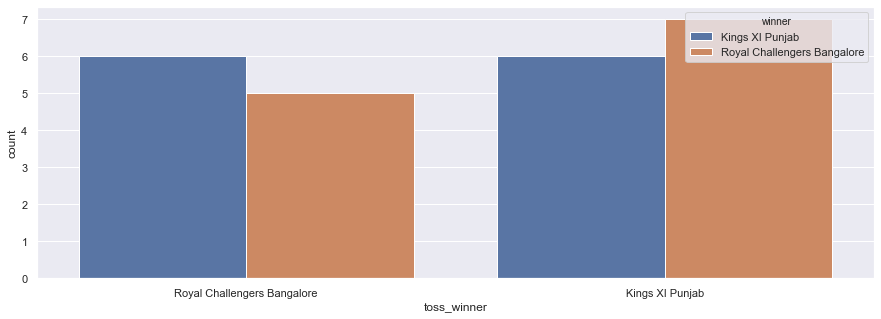

In [59]:
sns.set({'figure.figsize':(15,5)})
sns.countplot(x='toss_winner',hue="winner",data=RCB_KXIP)

In [60]:
print("No of times toss won by both teams:")
RCB_KXIP['toss_winner'].value_counts()

No of times toss won by both teams:


Kings XI Punjab                13
Royal Challengers Bangalore    11
Name: toss_winner, dtype: int64

# correlation between Columns in Matches Dataset

In [62]:
RCB_KXIP.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.664173,-0.073133,-0.167163,0.146040
season,0.664173,1.000000,0.151008,0.030183,-0.155173
dl_applied,-0.073133,0.151008,1.000000,0.323767,-0.228297
win_by_runs,-0.167163,0.030183,0.323767,1.000000,-0.602564
win_by_wickets,0.146040,-0.155173,-0.228297,-0.602564,1.000000


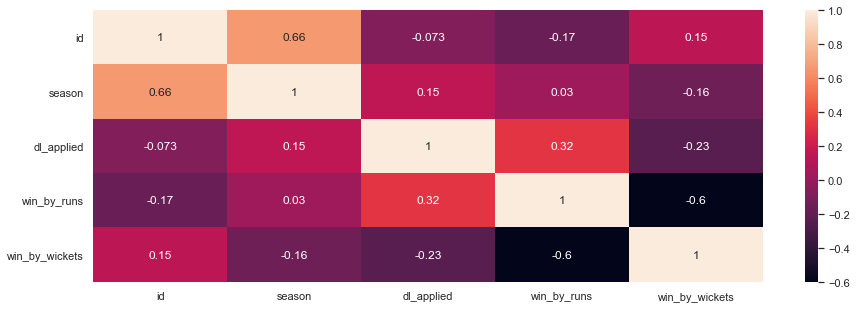

In [63]:
sns.heatmap(RCB_KXIP.corr(),yticklabels=True,annot=True)

In [64]:
RCB_KXIP['winner']=pd.get_dummies(RCB_KXIP['winner'])

In [66]:
RCB_KXIP.head(2)#1-KXIP,2-RCB

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
41,42,2017,2017-05-05,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,1,19,0,Sandeep Sharma,M Chinnaswamy Stadium,CB Gaffaney,C Shamshuddin
180,181,2010,2010-03-16,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,0,0,8,JH Kallis,M Chinnaswamy Stadium,S Das,DJ Harper


# Using Sweetviz we can get complete details about the Matches how both team went on win the game.what made them to win the game on that particular day 

In [68]:
import sweetviz 
my_report=sweetviz.analyze([RCB_KXIP,'RCB_KXIP'],target_feat='winner')

:FEATURES DONE:                    |█████████████████████| [100%]   00:09  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [69]:
my_report.show_html("Report1.html")

# Now let gets into the Deliveries Dataset

In [70]:
Deliveries=pd.read_csv("deliveries.csv")

In [71]:
Deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [72]:
Deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [73]:
Deliveries.describe

<bound method NDFrame.describe of         match_id  inning         batting_team                 bowling_team  \
0              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
...          ...     ...                  ...                          ...   
179073     11415       2  Chennai Super Kings               Mumbai Indians   
179074     11415       2  Chennai Super Kings               Mumbai Indians   
179075     11415       2  Chennai Super Kings               Mumbai Indians   
179076     11415       2  Chennai Super Kings               Mumbai Indians   
179077     11415       2  Chennai Super Kings               Mumbai Indians   

        over  ball    batsman

# Filtering the match details that only takes place between RCB and  KXIP 

In [74]:
Rcb_Kxip1=Deliveries.loc[(Deliveries['batting_team' ] =='Royal Challengers Bangalore' ) & (Deliveries['bowling_team'] == 'Kings XI Punjab')]

In [75]:
Rcb_Kxip1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1678,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,1,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1679,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,2,Vishnu Vinod,SR Watson,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1680,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,3,Vishnu Vinod,SR Watson,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1681,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,4,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1682,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,5,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174814,11333,1,Royal Challengers Bangalore,Kings XI Punjab,20,2,AB de Villiers,MP Stoinis,H Viljoen,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
174815,11333,1,Royal Challengers Bangalore,Kings XI Punjab,20,3,MP Stoinis,AB de Villiers,H Viljoen,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
174816,11333,1,Royal Challengers Bangalore,Kings XI Punjab,20,4,MP Stoinis,AB de Villiers,H Viljoen,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
174817,11333,1,Royal Challengers Bangalore,Kings XI Punjab,20,5,MP Stoinis,AB de Villiers,H Viljoen,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [76]:
Rcb_Kxip2=Deliveries.loc[(Deliveries['bowling_team' ] =='Royal Challengers Bangalore' ) & (Deliveries['batting_team'] == 'Kings XI Punjab')]

In [77]:
Rcb_Kxip2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1801,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,1,M Vohra,HM Amla,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1802,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,2,M Vohra,HM Amla,B Stanlake,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1803,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,3,HM Amla,M Vohra,B Stanlake,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
1804,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,4,HM Amla,M Vohra,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1805,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,5,HM Amla,M Vohra,B Stanlake,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174939,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,2,R Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,R Ashwin,caught,V Kohli
174940,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,3,H Viljoen,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,H Viljoen,caught,PA Patel
174941,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,4,M Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
174942,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,5,M Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [78]:
Rcb_Kxip=Rcb_Kxip1.append(Rcb_Kxip2)

# Complete Details Of RCB vs KXIP

In [79]:
Rcb_Kxip

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1678,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,1,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1679,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,2,Vishnu Vinod,SR Watson,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1680,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,3,Vishnu Vinod,SR Watson,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1681,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,4,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1682,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,5,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174939,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,2,R Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,R Ashwin,caught,V Kohli
174940,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,3,H Viljoen,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,H Viljoen,caught,PA Patel
174941,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,4,M Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
174942,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,5,M Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


# using Match_id we can summarize that 24 matches were played between RCB and KXIP

In [80]:
Rcb_Kxip['match_id'].value_counts()

488      255
11333    250
181      248
333      248
139      247
280      246
615      246
350      244
11319    242
205      242
127      242
42       240
475      240
429      239
448      238
84       238
7901     237
296      232
94       221
557      212
8        212
626      186
7941     145
566      126
Name: match_id, dtype: int64

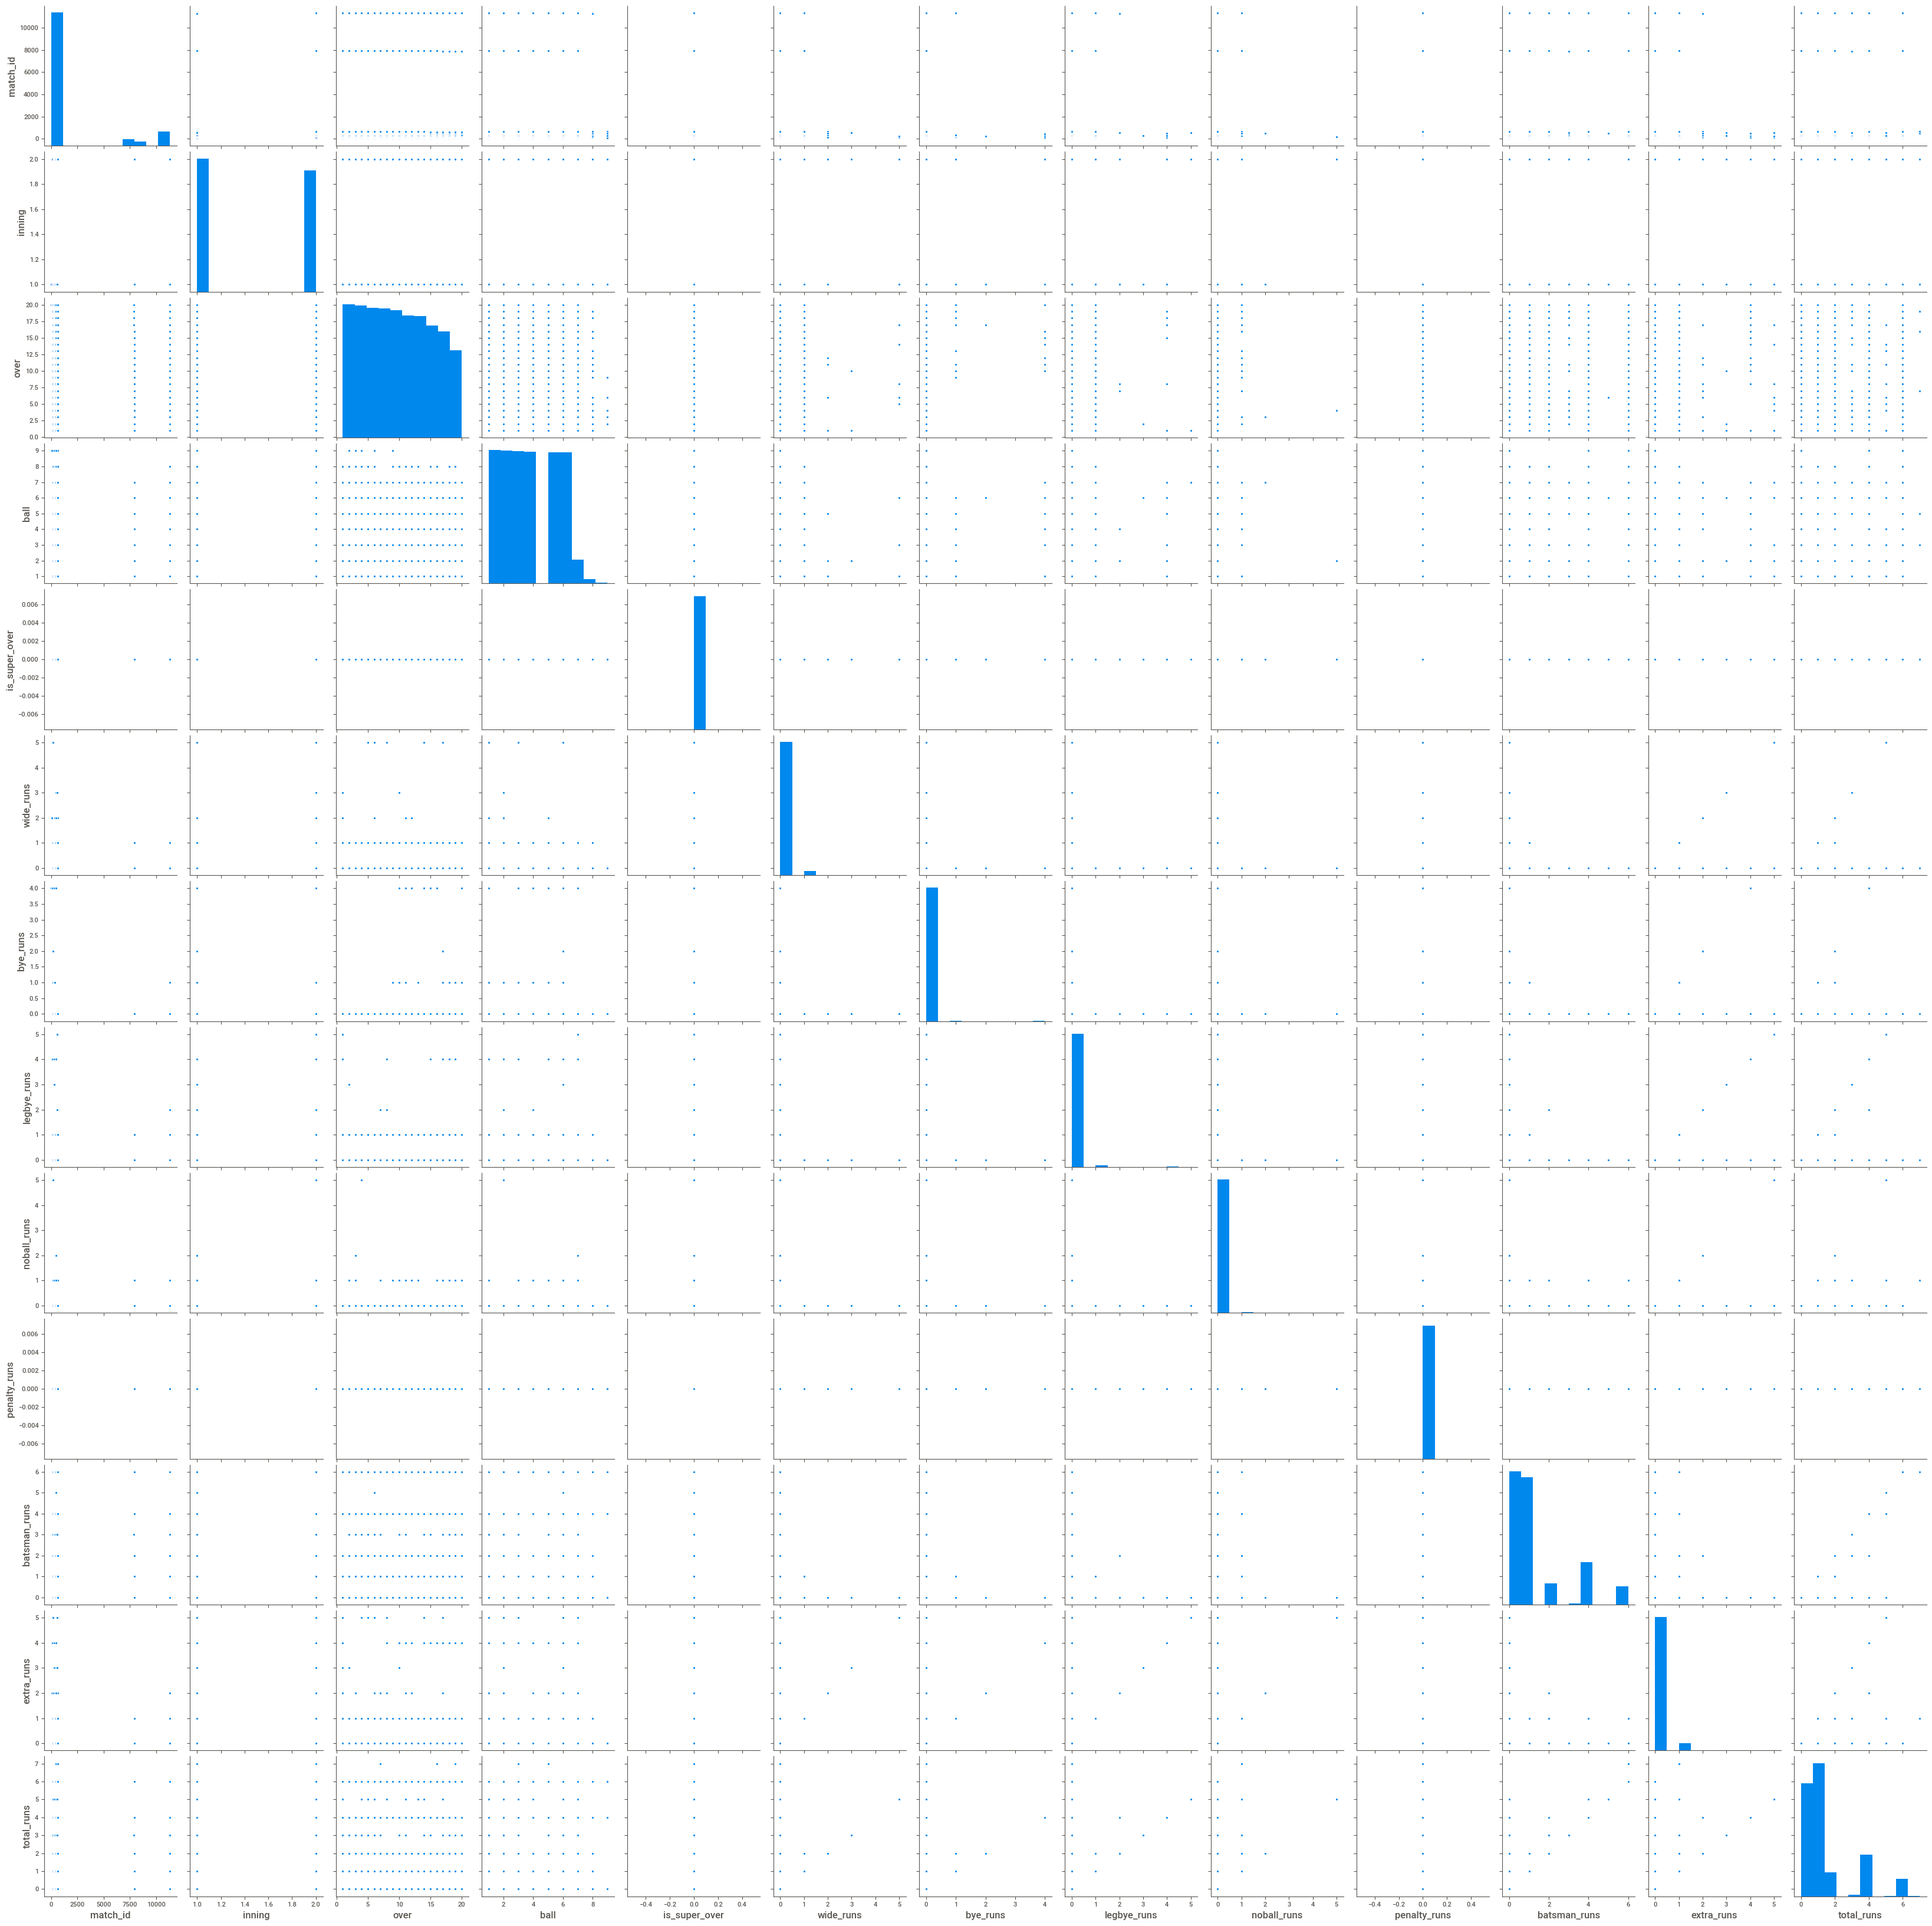

In [81]:
sns.pairplot(Rcb_Kxip)

In [82]:
Rcb_Kxip.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,-0.001948,0.000942,-0.010606,NaN,-0.022852,-0.016751,-0.013756,-0.006806,NaN,0.029725,-0.031916,0.022648
inning,-0.001948,1.000000,-0.063573,-0.010033,NaN,-0.005710,-0.020187,0.008994,-0.003160,NaN,-0.014570,-0.007768,-0.016397
over,0.000942,-0.063573,1.000000,-0.011262,NaN,-0.007453,0.044175,0.013961,0.003055,NaN,0.092515,0.023375,0.098246
ball,-0.010606,-0.010033,-0.011262,1.000000,NaN,-0.023757,0.006495,0.021572,0.000005,NaN,-0.015967,0.000460,-0.015940
is_super_over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wide_runs,-0.022852,-0.005710,-0.007453,-0.023757,NaN,1.000000,-0.008016,-0.016606,-0.008493,NaN,-0.112221,0.627956,0.029296
bye_runs,-0.016751,-0.020187,0.044175,0.006495,NaN,-0.008016,1.000000,-0.005574,-0.002851,NaN,-0.039495,0.421002,0.055553
legbye_runs,-0.013756,0.008994,0.013961,0.021572,NaN,-0.016606,-0.005574,1.000000,-0.005905,NaN,-0.075912,0.585901,0.056265
noball_runs,-0.006806,-0.003160,0.003055,0.000005,NaN,-0.008493,-0.002851,-0.005905,1.000000,NaN,0.004333,0.245762,0.059949
penalty_runs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Correlation between Features.From the correlation plot we can clearly see that extra runs,wide runs ,bye runs are correlated and apart from that batsman runs column and total_runs columns are highly correlated 

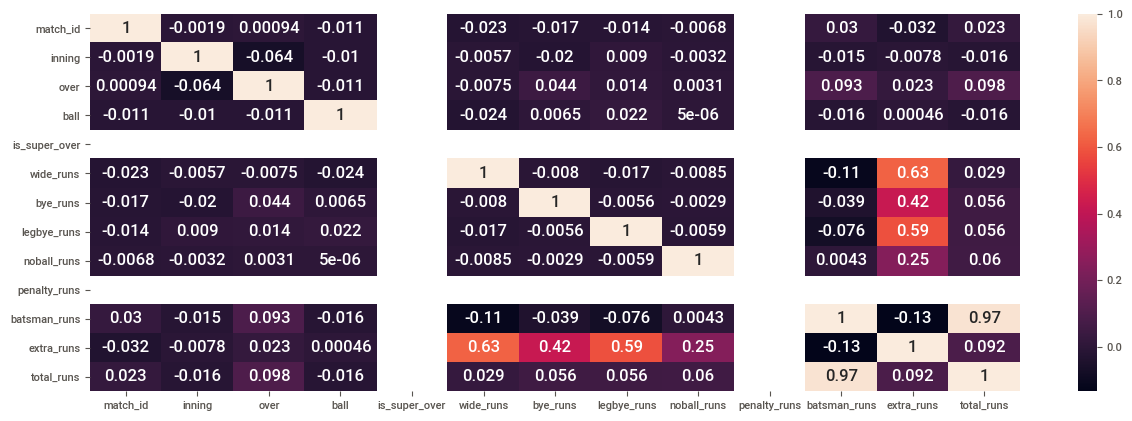

In [83]:
sns.heatmap(Rcb_Kxip.corr(),yticklabels=True,annot=True)

In [84]:
Rcb_Kxip.describe

<bound method NDFrame.describe of         match_id  inning                 batting_team  \
1678           8       1  Royal Challengers Bangalore   
1679           8       1  Royal Challengers Bangalore   
1680           8       1  Royal Challengers Bangalore   
1681           8       1  Royal Challengers Bangalore   
1682           8       1  Royal Challengers Bangalore   
...          ...     ...                          ...   
174939     11333       2              Kings XI Punjab   
174940     11333       2              Kings XI Punjab   
174941     11333       2              Kings XI Punjab   
174942     11333       2              Kings XI Punjab   
174943     11333       2              Kings XI Punjab   

                       bowling_team  over  ball        batsman    non_striker  \
1678                Kings XI Punjab     1     1      SR Watson   Vishnu Vinod   
1679                Kings XI Punjab     1     2   Vishnu Vinod      SR Watson   
1680                Kings XI Punjab   

In [85]:
Rcb_Kxip.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,5476.000000,5476.000000,5476.000000,5476.000000,5476.0,5476.000000,5476.000000,5476.000000,5476.000000,5476.0,5476.000000,5476.000000,5476.000000
mean,1829.582542,1.476991,9.894996,3.620526,0.0,0.037436,0.008400,0.024288,0.005296,0.0,1.316472,0.075420,1.391892
std,3558.494281,0.499516,5.612065,1.815482,0.0,0.242259,0.161959,0.226052,0.096369,0.0,1.672040,0.376441,1.664071
min,8.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,139.000000,1.000000,5.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,350.000000,1.000000,10.000000,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
75%,566.000000,2.000000,15.000000,5.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,2.000000
max,11333.000000,2.000000,20.000000,9.000000,0.0,5.000000,4.000000,5.000000,5.000000,0.0,6.000000,5.000000,7.000000


# How many wickets will KXIP lose in this match?

In [86]:
Rcb_Kxip2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1801,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,1,M Vohra,HM Amla,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1802,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,2,M Vohra,HM Amla,B Stanlake,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1803,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,3,HM Amla,M Vohra,B Stanlake,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
1804,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,4,HM Amla,M Vohra,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1805,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,5,HM Amla,M Vohra,B Stanlake,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174939,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,2,R Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,R Ashwin,caught,V Kohli
174940,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,3,H Viljoen,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,H Viljoen,caught,PA Patel
174941,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,4,M Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
174942,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,5,M Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


# KXIP had been lost around 135 wickets From the 24 matches played between KXIP and RCB.

In [89]:
Rcb_Kxip2['dismissal_kind'].value_counts()

caught               79
bowled               29
run out              12
lbw                   8
stumped               5
caught and bowled     2
Name: dismissal_kind, dtype: int64

In [94]:
print("So Average wickets lost by KXIP when they are batting",135/24)

So Average wickets lost by KXIP when they are batting 5.625


In [95]:
print("Average wickets lost by KXIP when they are batting is 6")

Average wickets lost by KXIP when they are batting is 6


# How many runs partnership will virat kholi and Ab de villiers put up ?

In [98]:
Rcb_Kxip1.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1678,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,1,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1679,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,2,Vishnu Vinod,SR Watson,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [105]:
Virat_Abd=Rcb_Kxip1.loc[(Rcb_Kxip1['batsman']=='V Kohli')&(Rcb_Kxip1['non_striker']=='AB de Villiers')]
Virat_Abd

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
66279,280,1,Royal Challengers Bangalore,Kings XI Punjab,15,6,V Kohli,AB de Villiers,PP Chawla,0,...,0,0,0,0,0,0,0,V Kohli,bowled,NaN
82578,350,1,Royal Challengers Bangalore,Kings XI Punjab,17,4,V Kohli,AB de Villiers,PP Chawla,0,...,0,0,0,0,0,0,0,V Kohli,bowled,NaN
106221,448,1,Royal Challengers Bangalore,Kings XI Punjab,16,5,V Kohli,AB de Villiers,MS Gony,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
106226,448,1,Royal Challengers Bangalore,Kings XI Punjab,17,4,V Kohli,AB de Villiers,P Awana,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
106228,448,1,Royal Challengers Bangalore,Kings XI Punjab,17,6,V Kohli,AB de Villiers,P Awana,0,...,0,0,0,0,0,0,0,V Kohli,caught,SE Marsh
145420,615,1,Royal Challengers Bangalore,Kings XI Punjab,8,5,V Kohli,AB de Villiers,KC Cariappa,0,...,0,0,0,0,0,0,0,V Kohli,caught,M Vijay
147939,626,1,Royal Challengers Bangalore,Kings XI Punjab,12,1,V Kohli,AB de Villiers,KJ Abbott,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
147940,626,1,Royal Challengers Bangalore,Kings XI Punjab,12,2,V Kohli,AB de Villiers,KJ Abbott,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
171459,11319,2,Royal Challengers Bangalore,Kings XI Punjab,4,6,V Kohli,AB de Villiers,R Ashwin,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
171460,11319,2,Royal Challengers Bangalore,Kings XI Punjab,5,1,V Kohli,AB de Villiers,Mohammed Shami,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


# All extra runs(wide, noballs,bye,leg byes,penalty runs) given by bowling team during a patnership added in the partnership.so that's why i choose 'total_runs' over 'batsman_runs'.

In [103]:
Virat_Abd['total_runs'].value_counts()

1    22
0    16
2     5
4     4
6     1
Name: total_runs, dtype: int64

In [104]:
Virat_Abd['total_runs'].sum()

54

In [134]:
Virat_Abd['match_id'].value_counts()

11319    40
448       3
626       2
615       1
350       1
280       1
Name: match_id, dtype: int64

In [127]:
Abd_Virat=Rcb_Kxip1.loc[(Rcb_Kxip1['non_striker']=='V Kohli')&(Rcb_Kxip1['batsman']=='AB de Villiers')]

In [129]:
Abd_Virat['total_runs'].value_counts()

1    26
0    15
4     7
2     3
6     1
Name: total_runs, dtype: int64

In [135]:
Abd_Virat['match_id'].value_counts()

11319    31
448       8
350       7
626       2
429       2
615       1
280       1
Name: match_id, dtype: int64

In [130]:
Abd_Virat['total_runs'].sum()

66

In [131]:
Virat_Abd_Partnership=Virat_Abd.append(Abd_Virat)

In [132]:
Virat_Abd_Partnership

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
66279,280,1,Royal Challengers Bangalore,Kings XI Punjab,15,6,V Kohli,AB de Villiers,PP Chawla,0,...,0,0,0,0,0,0,0,V Kohli,bowled,NaN
82578,350,1,Royal Challengers Bangalore,Kings XI Punjab,17,4,V Kohli,AB de Villiers,PP Chawla,0,...,0,0,0,0,0,0,0,V Kohli,bowled,NaN
106221,448,1,Royal Challengers Bangalore,Kings XI Punjab,16,5,V Kohli,AB de Villiers,MS Gony,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
106226,448,1,Royal Challengers Bangalore,Kings XI Punjab,17,4,V Kohli,AB de Villiers,P Awana,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
106228,448,1,Royal Challengers Bangalore,Kings XI Punjab,17,6,V Kohli,AB de Villiers,P Awana,0,...,0,0,0,0,0,0,0,V Kohli,caught,SE Marsh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171518,11319,2,Royal Challengers Bangalore,Kings XI Punjab,14,4,AB de Villiers,V Kohli,AJ Tye,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
171521,11319,2,Royal Challengers Bangalore,Kings XI Punjab,15,1,AB de Villiers,V Kohli,M Ashwin,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
171524,11319,2,Royal Challengers Bangalore,Kings XI Punjab,15,4,AB de Villiers,V Kohli,M Ashwin,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
171525,11319,2,Royal Challengers Bangalore,Kings XI Punjab,15,5,AB de Villiers,V Kohli,M Ashwin,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [133]:
Virat_Abd_Partnership['total_runs'].value_counts()

1    48
0    31
4    11
2     8
6     2
Name: total_runs, dtype: int64

# From the match_Id we can predict virat_abd partnership came only 7times.

In [136]:
Virat_Abd_Partnership['match_id'].value_counts()

11319    71
448      11
350       8
626       4
615       2
429       2
280       2
Name: match_id, dtype: int64

# It looks like Virat_Abd duo partnership against KXIP doesn't looks good from past encounters they only scored 120 runs from 7situations(They both were partnered)against KXIP.

In [137]:
Virat_Abd_Partnership['total_runs'].sum()

120

In [139]:
print("Average runs scored based on Virat_Abd duo against KXIP was ",120//7)

Average runs scored based on Virat_Abd duo against KXIP was  17


# Virat_Abd_Partnership against KXIP bowlers.Currently Mohammed shami and Aj Tye playing for KXIP

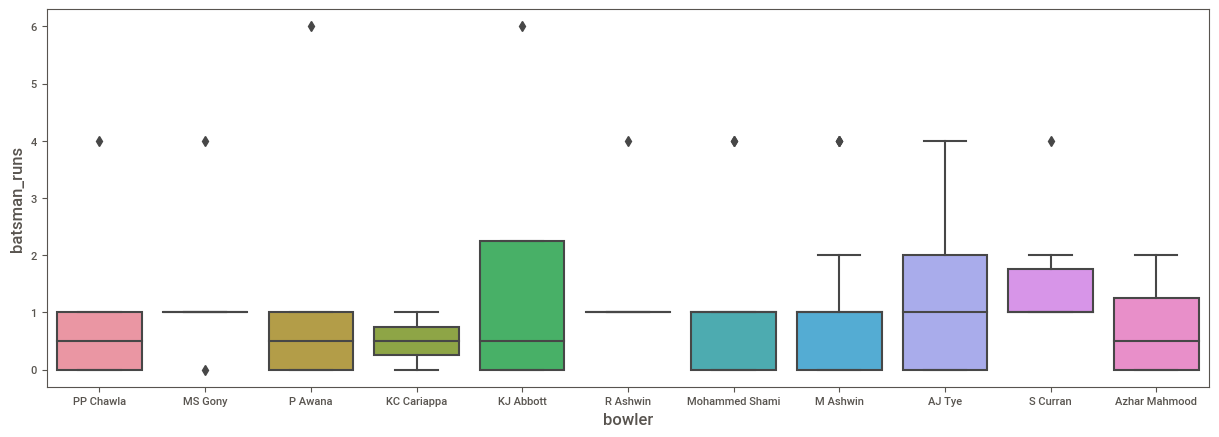

In [145]:
sns.boxplot(y='batsman_runs',x='bowler',data=Virat_Abd_Partnership)

# Ball by Ball performance by Virat_Abd duo against KXIP.They smashed fours against current KXIP bowlers.

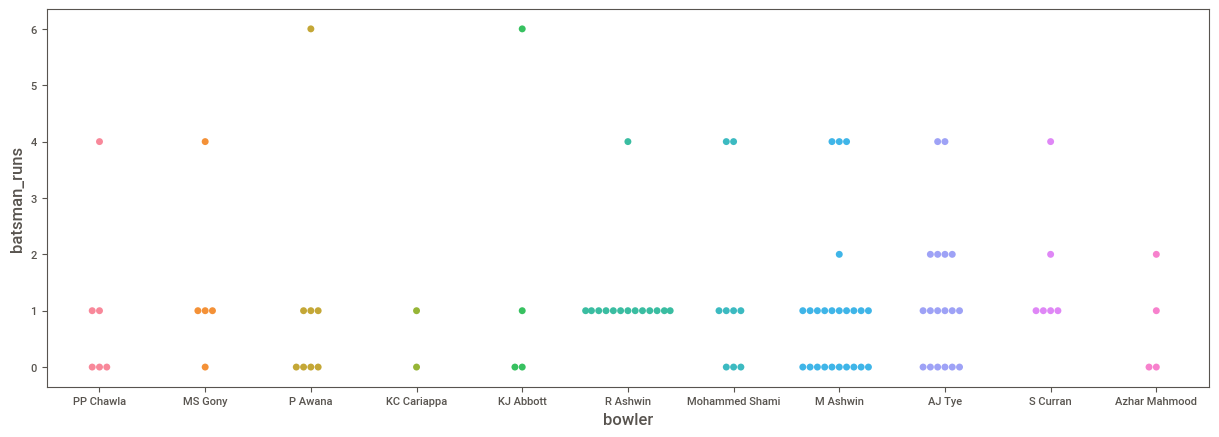

In [146]:
sns.swarmplot(y='batsman_runs',x='bowler',data=Virat_Abd_Partnership)

# Parnership including extras

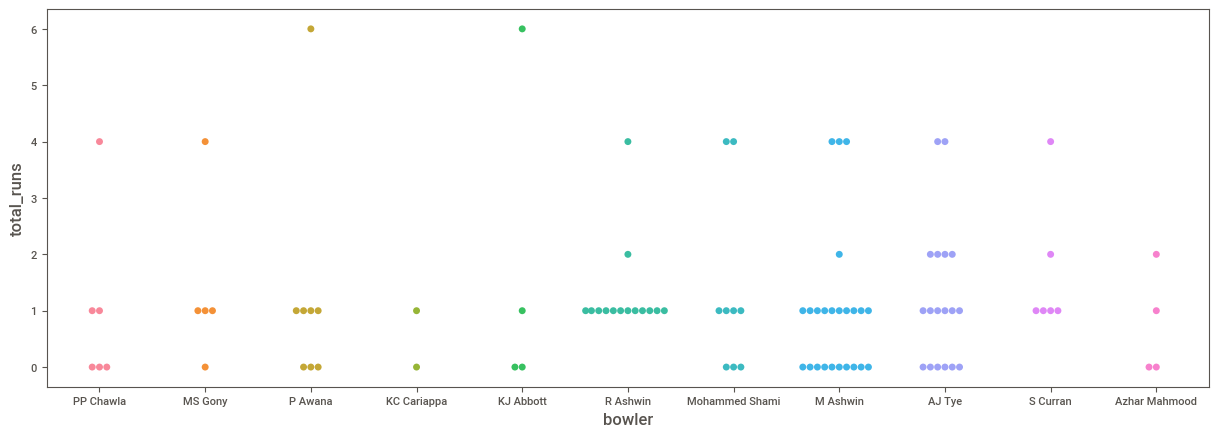

In [152]:
sns.swarmplot(y='total_runs',x='bowler',data=Virat_Abd_Partnership)

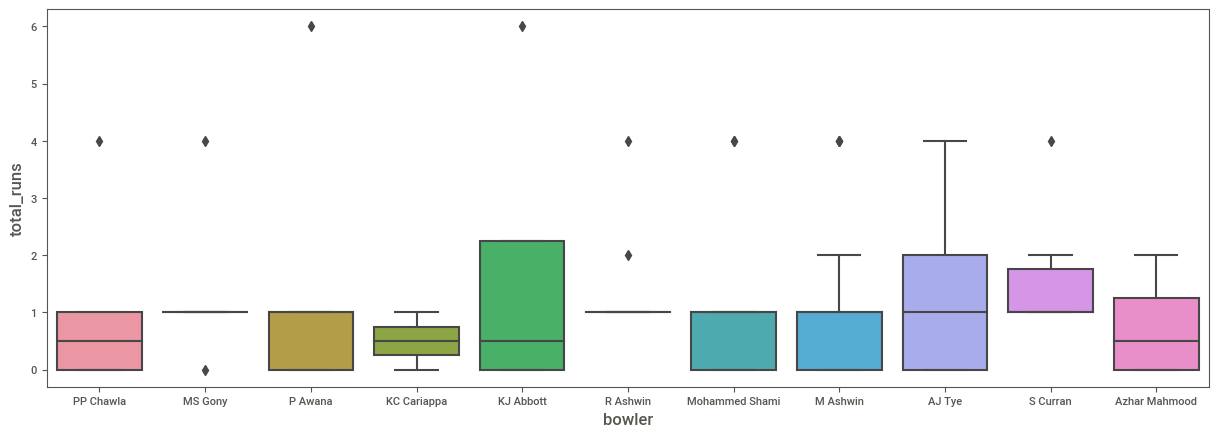

In [153]:
sns.boxplot(y='total_runs',x='bowler',data=Virat_Abd_Partnership)

In [154]:
import sweetviz 
Report_Virat_Abd=sweetviz.analyze([Virat_Abd_Partnership,'Virat_Abd_Partnership'])



                                   |                         | [  0%]   00:00  -> (? left)

Summarizing dataframe:             |                         | [  0%]   00:00  -> (? left)

:match_id:                         |█▉                   | [  9%]   00:00  -> (00:00 left)

:match_id:                         |██▊                  | [ 14%]   00:00  -> (00:03 left)

:inning:                           |██▊                  | [ 14%]   00:00  -> (00:03 left)

:inning:                           |███▊                 | [ 18%]   00:00  -> (00:04 left)

:batting_team:                     |███▊                 | [ 18%]   00:00  -> (00:04 left)

:batting_team:                     |████▊                | [ 23%]   00:01  -> (00:04 left)

:bowling_team:                     |████▊                | [ 23%]   00:01  -> (00:04 left)

:bowling_team:                     |█████▋               | [ 27%]   00:01  -> (00:04 left)

:over:                             |█████▋               | [ 27%]   00:01  -> 

Creating Associations graph... DONE!


In [155]:
Report_Virat_Abd.show_html()

# How many 6's will be hit in the match?

In [156]:
Rcb_Kxip

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1678,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,1,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1679,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,2,Vishnu Vinod,SR Watson,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1680,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,3,Vishnu Vinod,SR Watson,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1681,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,4,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1682,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,5,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174939,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,2,R Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,R Ashwin,caught,V Kohli
174940,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,3,H Viljoen,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,H Viljoen,caught,PA Patel
174941,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,4,M Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
174942,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,5,M Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [157]:
Rcb_Kxip.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1678,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,1,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1679,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,2,Vishnu Vinod,SR Watson,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [158]:
Rcb_Kxip['batsman_runs'].value_counts()

0    2121
1    2029
4     675
2     342
6     289
3      19
5       1
Name: batsman_runs, dtype: int64

In [159]:
print("RCB and KXIP smashed {} sixes from their 24 matches".format(289))

RCB and KXIP smashed 289 sixes from their 24 matches


In [162]:
print("Average sixes hit by RCB and KXIP in a single match is",289//24)

Average sixes hit by RCB and KXIP in a single match is 12


# Probability of runs Taken by hitting 6 was 0.4

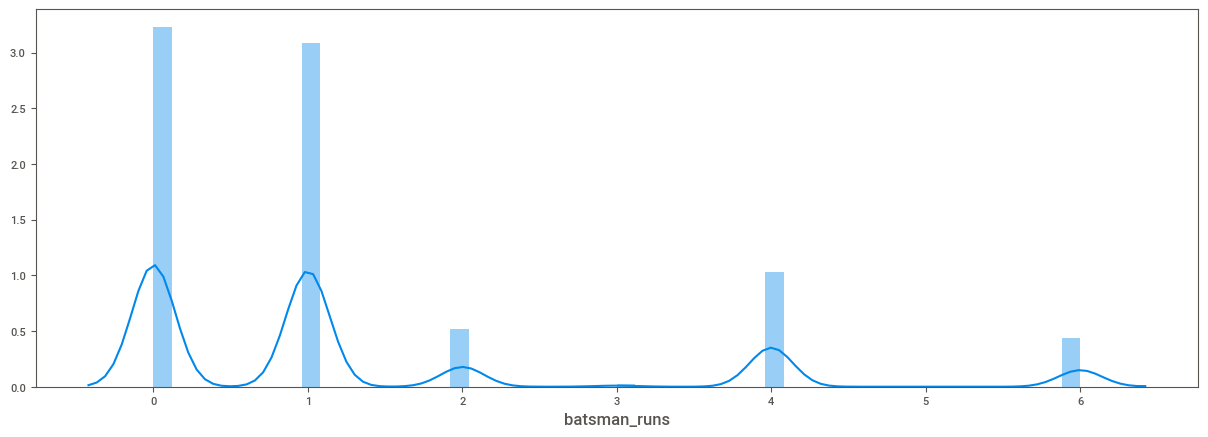

In [167]:
sns.distplot(Rcb_Kxip['batsman_runs'])

# How many no balls will be bowled in this match?

In [174]:
Rcb_Kxip['noball_runs'].value_counts()

0    5452
1      22
2       1
5       1
Name: noball_runs, dtype: int64

In [177]:
Rcb_Kxip['noball_runs'].sum()

29

In [185]:
print("Total of 29 no balls were bowled from 24 matches during RCB_KXIP Face off")

Total of 29 no balls were bowled from 24 matches during RCB_KXIP Face off


In [184]:
Noball_runs=Rcb_Kxip.groupby('match_id')['noball_runs']

# 29 No_ball were bowled from 24 matches where RCB and KXIP Faced each other.In match_id 181 a total of 6 no balls were bowled in a single match.

In [180]:
Noball_runs.sum()

match_id
8        0
42       0
84       0
94       0
127      0
139      0
181      6
205      2
280      1
296      2
333      1
350      0
429      3
448      2
475      2
488      3
557      1
566      1
615      0
626      2
7901     0
7941     1
11319    0
11333    2
Name: noball_runs, dtype: int64

In [189]:
print(" Average no_balls bowled in a single match of RCB_KXIP :",29//24)

 Average no_balls bowled in a single match of RCB_KXIP : 1


In [190]:
Rcb_Kxip1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1678,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,1,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1679,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,2,Vishnu Vinod,SR Watson,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1680,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,3,Vishnu Vinod,SR Watson,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1681,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,4,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1682,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,5,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174814,11333,1,Royal Challengers Bangalore,Kings XI Punjab,20,2,AB de Villiers,MP Stoinis,H Viljoen,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
174815,11333,1,Royal Challengers Bangalore,Kings XI Punjab,20,3,MP Stoinis,AB de Villiers,H Viljoen,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
174816,11333,1,Royal Challengers Bangalore,Kings XI Punjab,20,4,MP Stoinis,AB de Villiers,H Viljoen,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
174817,11333,1,Royal Challengers Bangalore,Kings XI Punjab,20,5,MP Stoinis,AB de Villiers,H Viljoen,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [ ]:
sns.swarmplot(y='batsman_runs',x='noball_runs',hue='bowler',data=Rcb_Kxip)

In [ ]:
sns.boxplot(x='bowler',y='noball_runs',data=Rcb_Kxip)

# #  We can predict the match results from this analysis but current form of  players plays an huge role in predicting the winner in this match.From my analysis ,1.Toss plays a crucial role in this match.Those who are gonna won the toss have more chance to win the match.2.RCB has more chance to win the match based on current form of the team.3.Virat_Abd partnership ll be around 16-25 from my analysis.4.Average sixes was around 12 in a single match.Noballs will be not more than 2.so it is(1-2)
 